In [1]:
!pip install -q transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import os

In [3]:
from google.colab import files

print(files.upload())

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

Saving kaggle.json to kaggle.json
{'kaggle.json': b'{"username":"srijansbhat","key":"108d8f12e1ce3be7271ff06383dabf9f"}'}
 99% 803M/814M [00:04<00:00, 175MB/s]
100% 814M/814M [00:04<00:00, 202MB/s]


In [4]:
!unzip /content/dogs-vs-cats-redux-kernels-edition.zip

Archive:  /content/dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               


In [5]:
%%capture
!unzip /content/test.zip

In [6]:
from PIL import Image

from transformers import CLIPProcessor, CLIPModel

In [7]:
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [8]:
sample_sub = '/content/sample_submission.csv'

In [9]:
submission = pd.read_csv(sample_sub)

In [10]:
imgstest = submission['id']

In [11]:
imgstest[2]

3

In [12]:
imgtest = Image.open(os.path.join('/content/test', str(imgstest[2]) + '.jpg',)).convert('RGB')

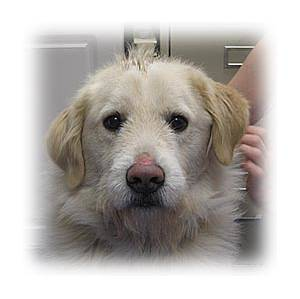

In [13]:
imgtest

In [14]:
imgs = submission['id']
img = []
for i in range(12500):
  img_id = str(imgs[i])
  img.append(Image.open(os.path.join('/content/test', str(img_id) + '.jpg')).convert("RGB"))

In [15]:
%%capture
model.to('cuda')
input_text=["dog", "cat"]

In [ ]:
preds = []
for i in range(12500):
  inputs = processor(text = input_text, images=(img[i]), return_tensors="pt", padding=True).to('cuda')
  outputs = model(**inputs)
  pred = (outputs.logits_per_image.softmax(dim=1)[0][0] > 0.5)
  if pred:
    preds.append(1)
  else:
    preds.append(0)

In [ ]:
data = {
    'id' : submission['id'],
    'label' : preds
}
Submit_df = pd.DataFrame(data)

In [ ]:
submission_file = 'submissions.csv'
Submit_df.to_csv(submission_file, index=False)

Submitting the prediciton for this [competition](https://www.kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition/overview)

12500 images

Results : log_loss = 0.18789 ~ #760 of #1300 in competition

I didn't see that the probabilities of the image being a dog had to be predicted and not binary classification